In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets

In [6]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


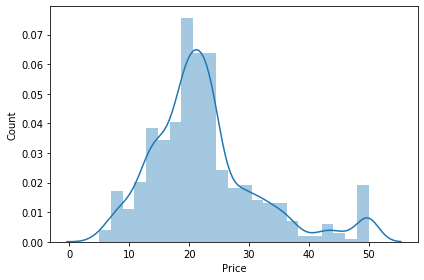

In [11]:
plt.figure(figsize=(6, 4))
sns.distplot(boston.target)
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()

In [13]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(boston.data, boston.target)

In [14]:
feature_weight_df = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
feature_weight_df.columns = ['Feature', 'Weight']
feature_weight_df

,Feature,Weight
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [19]:
predicted = linear_regression.predict(boston.data)
predicted[:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

In [20]:
prediction_ground_truth_df = pd.DataFrame(list(zip(predicted, boston.target)))
prediction_ground_truth_df.columns = ['Prediction', 'Ground truth']
prediction_ground_truth_df.head()

,Prediction,Ground truth
0,30.003843,24.0
1,25.025562,21.6
2,30.567597,34.7
3,28.607036,33.4
4,27.943524,36.2


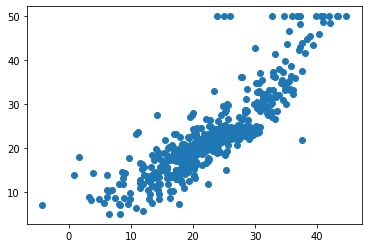

In [23]:
plt.figure(figsize=(6, 4))
plt.scatter(predicted, boston.target)


# Breast Cancer dataset

In [25]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = cancer.feature_names
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


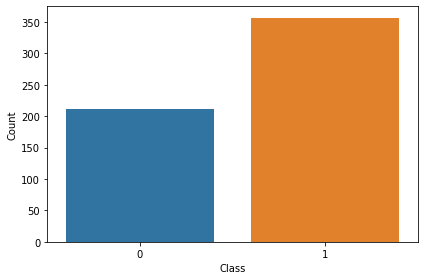

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(cancer.target)
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
model = logistic_regression.fit(cancer.data, cancer.target)

print(model.coef_)

[[ 0.96065526  0.46320118  0.27100715 -0.01579335 -0.03584698 -0.16869938
  -0.2361947  -0.09949358 -0.0496422  -0.00990767  0.04173762  0.38031693
   0.14909249 -0.10973376 -0.00324336 -0.03625596 -0.05050905 -0.01295816
  -0.0119849  -0.00336925  1.02153359 -0.50814186 -0.24832577 -0.01375321
  -0.06500317 -0.52590301 -0.65453948 -0.19139701 -0.15731118 -0.05055624]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
prediction = model.predict(cancer.data)
print(prediction[:10])

[0 0 0 1 0 0 0 0 0 0]


In [31]:
prediction = model.predict_proba(cancer.data)
print(prediction[:10])

[[1.00000000e+00 4.56168202e-15]
 [9.99999965e-01 3.45616876e-08]
 [9.99999735e-01 2.64685423e-07]
 [1.56275679e-01 8.43724321e-01]
 [9.99995123e-01 4.87695579e-06]
 [7.35386358e-01 2.64613642e-01]
 [9.99998681e-01 1.31930418e-06]
 [9.66630799e-01 3.33692012e-02]
 [6.97855602e-01 3.02144398e-01]
 [9.82101174e-01 1.78988262e-02]]


In [32]:
print(f'Accuracy: {model.score(cancer.data, cancer.target)}')

Accuracy: 0.9472759226713533


In [33]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}